(3456, 4608)


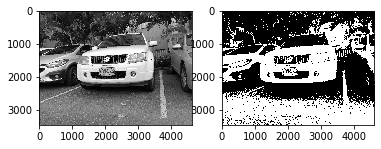

11
8
11
15
36
17
34
21
26
8
9
8
8
7
109
21
45
9
19
16
33
12
24
18
13
16
27
65
31
44
35
16
15
9
5
29
17
13
24
38
19
11
11
30
7
37
28
16
20
14
13
19
10
20
22
28
11
20
13
7
42
13
12
8
19
13
23
25
26
17
8
13
8
6
20
15
51
32
17
12
14
10
16
16
16
11
16
13
46
15
54
7
17
13
15
6
13
17
16
16
23
13
11
15
7
10
16
18
27
12
27
16
14
24
10
25
9
10
12
20
6
8
13
11
31
10
31
17
11
31
7
14
10
12
22
12
27
13
9
5
5
28
18
21
11
63
26
11
22
18
12
21
24
19
11
17
12
13
12
21
24
13
25
15
18
22
34
22
10
13
12
35
12
9
26
14
13
16
17
22
18
17
14
16
40
12
8
24
24
29
15
44
16
17
8
15
14
14
57
12
28
11
7
16
14
14
20
11
16
13
30
14
9
24
20
22
32
14
39
14
41
42
17
27
26
14
55
26
11
107
13
23
37
19
11
31
15
33
16
41
34
15
11
20
46
19
16
44
12
10
17
221
31
12
10
21
20
28
21
21
21
12
16
100
9
30
27
25
32
11
23
26
30
8
64
46
18
15
15
28
30
21
22
28
24
8
18
76
14
32
13
23
55
34
42
26
29
36
13
10
50
15
22
29
17
11
204
37
32
53
24
34
11
7
4608
10
83
24
26
43
43
46
60
24
23
35
11
7
9
5
36
28
19
50
28
43
39
19
10
24
25
54
14
2

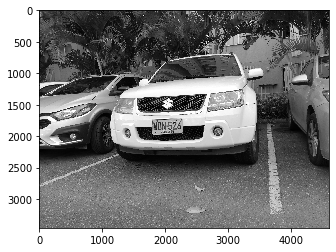

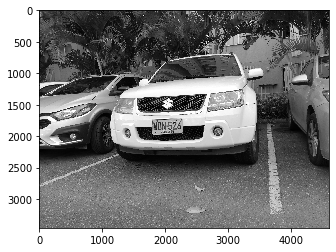

In [34]:
import cv2
import imutils
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

filename = './1.jpg'

#cap = cv2.VideoCapture(filename)
#cap = cv2.VideoCapture(0)
# count = 0
# while cap.isOpened() and count < 180:
#     ret,frame = cap.read()
#     if ret == True:
#         cv2.imshow('window-name',frame)
#         cv2.imwrite("./output/frame%d.jpg" % count, frame)
#         count = count + 1
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     else:
#         break
# cap.release()
# cv2.destroyAllWindows()

# car image -> grayscale image -> binary image

#car_image = imread("./output/frame%d.jpg"%(count-1), as_gray=True)
car_image = imread(filename, as_gray=True)
#car_image = imutils.rotate(car_image, 270)
# car_image = imread("car.png", as_gray=True)
# it should be a 2 dimensional array
print(car_image.shape)

# the next line is not compulsory however, a grey scale pixel
# in skimage ranges between 0 & 1. multiplying it with 255
# will make it range between 0 & 255 (something we can relate better with

gray_car_image = car_image * 255
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_car_image, cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
# print(binary_car_image)
ax2.imshow(binary_car_image, cmap="gray")
# ax2.imshow(gray_car_image, cmap="gray")
plt.show()

# CCA (finding connected regions) of binary image


from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# this gets all the connected regions and groups them together
label_image = measure.label(binary_car_image)

# print(label_image.shape[0]) #width of car img

# getting the maximum width, height and minimum width and height that a license plate can be
plate_dimensions = (0.03*label_image.shape[0], 0.08*label_image.shape[0], 0.15*label_image.shape[1], 0.3*label_image.shape[1])
plate_dimensions2 = (0.08*label_image.shape[0], 0.2*label_image.shape[0], 0.15*label_image.shape[1], 0.4*label_image.shape[1])
plate_dimensions = (0.02*label_image.shape[0], 0.04*label_image.shape[0], 0.14*label_image.shape[1], 0.25*label_image.shape[1])
plate_dimensions2 = (0.04*label_image.shape[0], 0.08*label_image.shape[0], 0.14*label_image.shape[1], 0.3*label_image.shape[1])

min_height, max_height, min_width, max_width = plate_dimensions
plate_objects_cordinates = []
plate_like_objects = []

fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray")
flag = 0
# regionprops creates a list of properties of all the labelled regions
for region in regionprops(label_image):
    if region.area < 80:
        #if the region is so small then it's likely not a license plate
        continue
        # the bounding box coordinates
    min_row, min_col, max_row, max_col = region.bbox
    # print(min_row)
    # print(min_col)
    # print(max_row)
    # print(max_col)

    region_height = max_row - min_row
    region_width = max_col - min_col
    # print(region_height)
    print(region_width)

    # ensuring that the region identified satisfies the condition of a typical license plate
    if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height and region_width < 600 :
        flag = 1
        plate_like_objects.append(binary_car_image[min_row:max_row,
                                  min_col:max_col])
        plate_objects_cordinates.append((min_row, min_col,
                                         max_row, max_col))
        rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                       linewidth=2, fill=False)
        ax1.add_patch(rectBorder)
        print(rectBorder)
        # let's draw a red rectangle over those regions
if(flag == 1):
    # print(plate_like_objects[0])
    plt.show()


if(flag==0):
    min_height, max_height, min_width, max_width = plate_dimensions2
    plate_objects_cordinates = []
    plate_like_objects = []

    fig, (ax1) = plt.subplots(1)
    ax1.imshow(gray_car_image, cmap="gray")

    # regionprops creates a list of properties of all the labelled regions
    for region in regionprops(label_image):
        if region.area < 80:
            #if the region is so small then it's likely not a license plate
            continue
            # the bounding box coordinates
        min_row, min_col, max_row, max_col = region.bbox
        # print(min_row)
        # print(min_col)
        # print(max_row)
        # print(max_col)

        region_height = max_row - min_row
        region_width = max_col - min_col
        # print(region_height)
        print(region_width)

        # ensuring that the region identified satisfies the condition of a typical license plate
        if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height and region_width < 600:
            plate_like_objects.append(binary_car_image[min_row:max_row,
                                      min_col:max_col])
            plate_objects_cordinates.append((min_row, min_col,
                                             max_row, max_col))
            rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                           linewidth=2, fill=False)
            ax1.add_patch(rectBorder)
            print(rectBorder)
            # let's draw a red rectangle over those regions
    #print(plate_like_objects[0])
    plt.show()

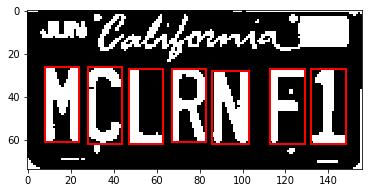

In [19]:
import numpy as np
from skimage.transform import resize
from skimage import measure
from skimage.measure import regionprops
import matplotlib.patches as patches
import matplotlib.pyplot as plt


# The invert was done so as to convert the black pixel to white pixel and vice versa
license_plate = np.invert(plate_like_objects[0])

labelled_plate = measure.label(license_plate)

fig, ax1 = plt.subplots(1)
ax1.imshow(license_plate, cmap="gray")
# the next two lines is based on the assumptions that the width of
# a license plate should be between 5% and 15% of the license plate,
# and height should be between 35% and 60%
# this will eliminate some
character_dimensions = (0.35*license_plate.shape[0], 0.60*license_plate.shape[0], 0.05*license_plate.shape[1], 0.15*license_plate.shape[1])
min_height, max_height, min_width, max_width = character_dimensions

characters = []
counter=0
column_list = []
for regions in regionprops(labelled_plate):
    y0, x0, y1, x1 = regions.bbox
    region_height = y1 - y0
    region_width = x1 - x0

    if region_height > min_height and region_height < max_height and region_width > min_width and region_width < max_width:
        roi = license_plate[y0:y1, x0:x1]

        # draw a red bordered rectangle over the character.
        rect_border = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, edgecolor="red",
                                       linewidth=2, fill=False)
        ax1.add_patch(rect_border)

        # resize the characters to 20X20 and then append each character into the characters list
        resized_char = resize(roi, (20, 20))
        characters.append(resized_char)

        # this is just to keep track of the arrangement of the characters
        column_list.append(x0)
# print(characters)
plt.show()

In [20]:
import pickle
print("Loading model")
filename = './finalized_model.sav'
model = pickle.load(open(filename, 'rb'))

print('Model loaded. Predicting characters of number plate')
classification_result = []
for each_character in characters:
    # converts it to a 1D array
    each_character = each_character.reshape(1, -1);
    result = model.predict(each_character)
    classification_result.append(result)

print('Classification result')
print(classification_result)

plate_string = ''
for eachPredict in classification_result:
    plate_string += eachPredict[0]

print('Predicted license plate')
print(plate_string)

# it's possible the characters are wrongly arranged
# since that's a possibility, the column_list will be
# used to sort the letters in the right order

column_list_copy = column_list[:]
column_list.sort()
rightplate_string = ''
for each in column_list:
    rightplate_string += plate_string[column_list_copy.index(each)]

print('License plate')
print(rightplate_string)

Loading model
Model loaded. Predicting characters of number plate
Classification result
[array(['M'],
      dtype='<U1'), array(['C'],
      dtype='<U1'), array(['L'],
      dtype='<U1'), array(['L'],
      dtype='<U1'), array(['F'],
      dtype='<U1'), array(['1'],
      dtype='<U1'), array(['L'],
      dtype='<U1')]
Predicted license plate
MCLLF1L
License plate
MCLLLF1


/home/edlaptop/.local/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.19.1 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
